<a href="https://colab.research.google.com/github/nitishast/TF/blob/master/Functional_API_model_California_Housing_Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
%tensorflow_version 2.x

import numpy as np
import pandas as pd
import matplotlib as mp
import tensorflow as tf
from tensorflow import keras
import scipy
from sklearn.datasets import fetch_california_housing


TensorFlow 2.x selected.


In [2]:
housing = fetch_california_housing()
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

X_train_full,X_test,y_train_full,y_test = train_test_split(housing.data,housing.target)
X_train,X_valid,y_train,y_valid = train_test_split(X_train_full,y_train_full)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_valid_scaled = scaler.fit_transform(X_valid)
X_test_scaled = scaler.fit_transform(X_test)


In [3]:
from keras.models import Sequential


Using TensorFlow backend.


## Two type of networks Multilayer and Wide &  Deep.

Lets make a wide and deep model. A wide model connects all or parts of input layer directly to output layer.
> It makes the network to learn simple patter using wide(short path) and deep paterns using deep layers(deep path). 

>A simple MLP passes all the input through stack of layers henc patters can be slighlty distorted or lost in moving from input to output layers. 

In [0]:
## This is a functional API of Keras. We will call each layer with the output of previous layer.
## Once this is has been done, model can be compiled and evaluated.

input = keras.layers.Input(shape=X_train.shape[1:])#Defining an input shape. This shape can be different also if we want to train the model on a subset of dat.a
#Input layer just accepts the input and not the data actually. 
hidden1 = keras.layers.Dense(30,activation="relu")(input) # Calling the first dense layer with the input layer as a Function call hence the fuctional API.
hidden2 = keras.layers.Dense(30,activation="relu")(hidden1)# Next hidden layer accpets the output of first hidden layer.

concat = keras.layers.concatenate([input,hidden2]) # Using this method we can send the input data and output of hidden layer directly to output layer.
output = keras.layers.Dense(1)(concat)# Just using one neuron as just need one output value. No activation func as one conti variable. 

model = keras.models.Model(inputs=[input],outputs=[output]) # Compile this using both input and output layer



In [0]:
model.compile(loss='mse',optimizer="sgd")

In [20]:
model.summary()

Model: "model_2"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_11 (InputLayer)           [(None, 8)]          0                                            
__________________________________________________________________________________________________
dense_27 (Dense)                (None, 30)           270         input_11[0][0]                   
__________________________________________________________________________________________________
dense_28 (Dense)                (None, 30)           930         dense_27[0][0]                   
__________________________________________________________________________________________________
concatenate_9 (Concatenate)     (None, 38)           0           input_11[0][0]                   
                                                                 dense_28[0][0]             

In [22]:
model.fit(X_train_scaled,y_train,epochs=20,validation_data=(X_valid,y_valid))

Train on 11610 samples, validate on 3870 samples
Epoch 1/20
11610/11610 [==============================] - 1s 86us/sample - loss: 0.4804 - val_loss: 26541.8401
Epoch 2/20
11610/11610 [==============================] - 1s 81us/sample - loss: 0.4726 - val_loss: 18114.5507
Epoch 3/20
11610/11610 [==============================] - 1s 82us/sample - loss: 1.0918 - val_loss: 2665.9787
Epoch 4/20
11610/11610 [==============================] - 1s 88us/sample - loss: 0.5081 - val_loss: 5493.0434
Epoch 5/20
11610/11610 [==============================] - 1s 85us/sample - loss: 0.5109 - val_loss: 2709.4675
Epoch 6/20
11610/11610 [==============================] - 1s 84us/sample - loss: 0.4173 - val_loss: 4486.4522
Epoch 7/20
11610/11610 [==============================] - 1s 85us/sample - loss: 1.5651 - val_loss: 4547.8192
Epoch 8/20
11610/11610 [==============================] - 1s 82us/sample - loss: 0.4109 - val_loss: 3575.2937
Epoch 9/20
11610/11610 [==============================] - 1s 89us/sam

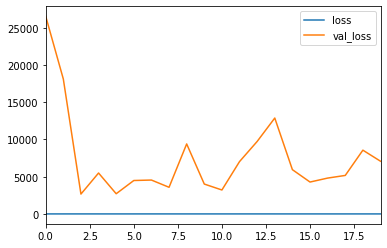

In [23]:
los = pd.DataFrame(model.history.history)
los.plot()

In [24]:
model.evaluate(X_test,y_test)

5160/5160 [==============================] - 0s 55us/sample - loss: 7011.7443


7011.744275375485